# Sales Prediction Using Python

# Importing The Libraries

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ACCESSING THE DATASET

In [58]:
data = pd.read_csv("advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# INSPECTING THE DATASET

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [60]:
data.shape

(200, 4)

In [61]:
#checking the missing values
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [62]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# PLOTTING THE DATA

<Axes: >

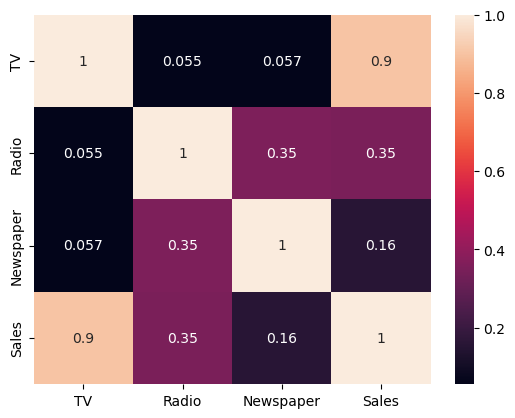

In [63]:
sns.heatmap(data.corr(),annot=True)

<Axes: >

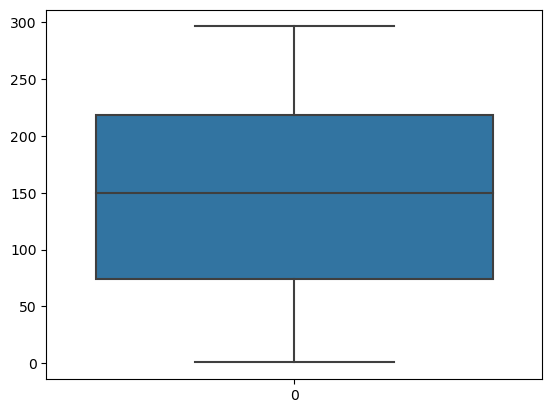

In [64]:
sns.boxplot(data["TV"])

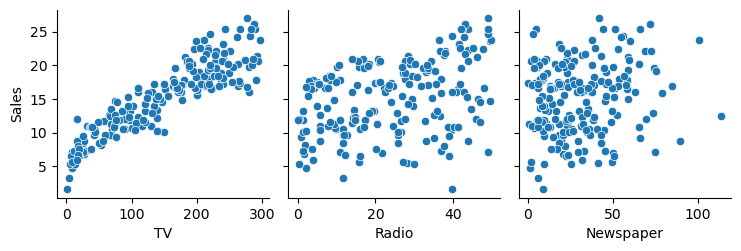

In [65]:
sns.pairplot(data,x_vars=['TV','Radio','Newspaper'],y_vars='Sales')
plt.show()

# Training & Testing Data

In [66]:
from sklearn.model_selection import train_test_split
x = data.drop('Sales', axis=1)
y= data['Sales']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [67]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(160, 3)
(40, 3)
(160,)
(40,)


In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = LinearRegression()
model.fit(x_train,y_train)
predictions=model.predict(x_test)

In [69]:
from sklearn.metrics import r2_score, mean_squared_error
print("R2 score:", r2_score(y_test, predictions))
print("Mean squared error:", mean_squared_error(y_test, predictions))

R2 score: 0.9059011844150826
Mean squared error: 2.907756910271092


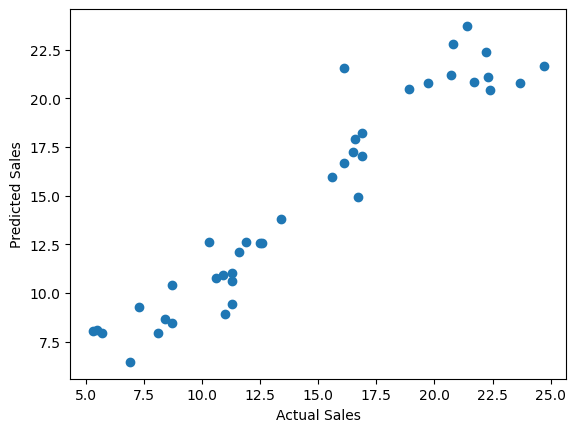

In [70]:
plt.scatter(y_test, predictions)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.show()

# LinearRegression

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [73]:
lin_score=print(lin_reg.score(x_train,y_train))

0.9001416005862131


In [74]:
y_pred_lin=lin_reg.predict(x_test)

In [75]:
from sklearn.metrics import r2_score, mean_squared_error

In [76]:
r2_score_lin=r2_score(y_test,y_pred_lin)
r2_score_lin

0.9059011844150826

In [77]:
mse_lin=mean_squared_error(y_test,y_pred_lin)
mse_lin

2.907756910271092

In [78]:
rmse_lin=np.sqrt(mse_lin)
rmse_lin

1.705214622934923

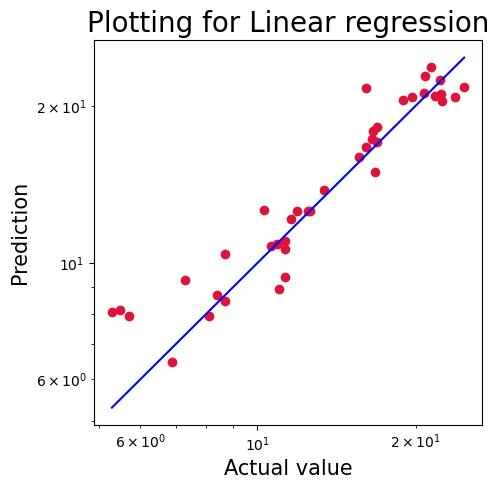

In [80]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,y_pred_lin,c="crimson")
plt.yscale("log")
plt.xscale("log")
p1=max(max(y_pred_lin), max(y_test))
p2=min(min(y_pred_lin), min(y_test))
plt.plot([p1,p2],[p1,p2],"b-")
plt.xlabel("Actual value",fontsize=15)
plt.ylabel("Prediction",fontsize=15)
plt.title("Plotting for Linear regression",fontsize=20)
plt.show()